/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


max point: [0.18367346938775508, -0.7959183673469388] -> 7.758621630113235


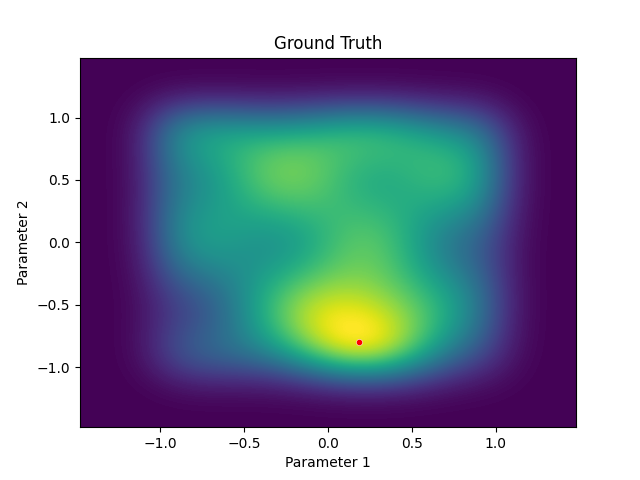

In [1]:
%matplotlib widget
"""
    We create a random 2D function to test out the parallel Bayesion optimization
    algorithm. The function is a simple sum of two sinusoidal functions. The
    algorithm should be able to find the maximum point in the function.
"""
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
np.random.seed(100)

# create a random 2D function to learn
def f(x):
    return (
        5
        * np.exp(
            -(((x[0] - 0.2) ** 2) / (2 * (0.1)) + ((x[1] + 0.7) ** 2) / (2 * (0.1)))
        )
        + np.cos(x[0] * 2.0)
        + np.sin(x[1] * 2.0)
        + np.cos(x[1] * 6.0) * np.sin(x[0] * 6.0)
        + 3
    )


# plot the function in 3D
fig = plt.figure()
ax = fig.add_subplot(111)
x1 = np.linspace(-1, 1, 50)
x2 = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x1, x2, indexing="ij")
Y = f([X1, X2])
# ax.plot_surface(X1, X2, Y, cmap="viridis", alpha=0.5)
sns.kdeplot(x=X1.ravel(), y=X2.ravel(), weights=Y.ravel(), fill=True, thresh=0, levels=500, cmap="viridis")

# get the max point, this is the ground truth
max_point = np.unravel_index(Y.argmax(), Y.shape)
max_x = [x1[max_point[0]], x2[max_point[1]]]
max_y = f(max_x)
# ax.scatter(max_x[0], max_x[1], max_y, color="r")
sns.scatterplot(x=np.array([max_x[0]]), y=np.array([max_x[1]]), color="r", s=20)
ax.set_xlabel("Parameter 1")
ax.set_ylabel("Parameter 2")
ax.set_title("Ground Truth")
print(f"max point: {max_x} -> {max_y}")
ground_truth = max_x

Text(0.5, 1.0, 'Initial Points')

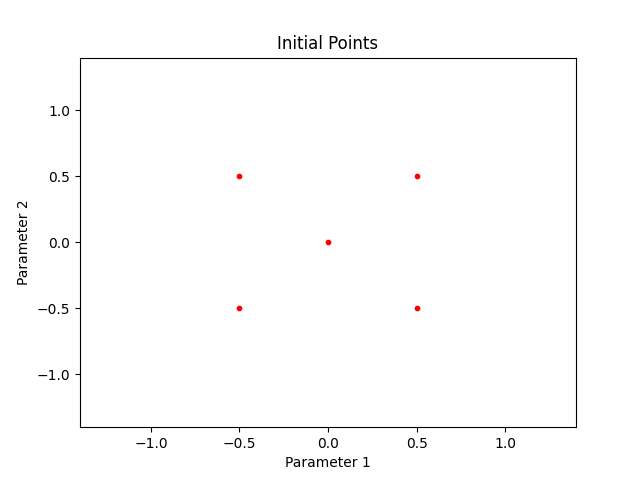

In [2]:
# now create a gaussian process regessor that we want to use for bayesian optimization
from sklearn.gaussian_process import GaussianProcessRegressor

# we want to use a matern kernel
from sklearn.gaussian_process.kernels import Matern

# create the matern kernel
kernel = Matern(length_scale=1, nu=2.5)
noise = 0.01
alpha = 0.01
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=10)

# now get some initial data points from the function for initialization
# sample equadistant points across surface
n_points = 5
X_train = np.array([[0, 0], [-0.5, -0.5], [-0.5, 0.5], [0.5, 0.5], [0.5, -0.5]])

# evaluate the function at the points
Y_train = np.array([f(x) for x in X_train]) + np.random.normal(
    0, noise, n_points
)

# plot the initial points on top of the first guess
# fit the gaussian process to the data
gpr.fit(X_train, Y_train)
Y_pred, Y_std = gpr.predict(
    np.stack([X1.ravel(), X2.ravel()], axis=1), return_std=True
)
fig = plt.figure()
ax = fig.add_subplot(111)
# sns.kdeplot(x=X1.ravel(), y=X2.ravel(), weights=np.ones(Y.ravel().shape), fill=True, thresh=0, levels=500, cmap="viridis")
# ax.plot_surface(X1, X2, Y, cmap="viridis", alpha=0.5)
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], color="r", s=20)
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.set_xlabel("Parameter 1")
ax.set_ylabel("Parameter 2")
ax.set_title("Initial Points")

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

iteration 1: max point: [ 0.63265306 -0.46938776] -> 5.147185598568821
iteration 1: std at max point: 0.14381844942084712


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

iteration 2: max point: [ 0.3877551  -0.63265306] -> 5.4048513286479665
iteration 2: std at max point: 0.23841241352481146


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

iteration 3: max point: [ 0.18367347 -0.75510204] -> 7.317411533876735
iteration 3: std at max point: 0.17896449155274244


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

iteration 4: max point: [ 0.18367347 -0.83673469] -> 7.741731995174943
iteration 4: std at max point: 0.08950838275119549


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

iteration 5: max point: [ 0.18367347 -0.79591837] -> 7.7271363803903235
iteration 5: std at max point: 0.04168646704235511
final max point: [ 0.18367347 -0.79591837] -> 7.731910886529745
final std at max point: 0.03532219306987754


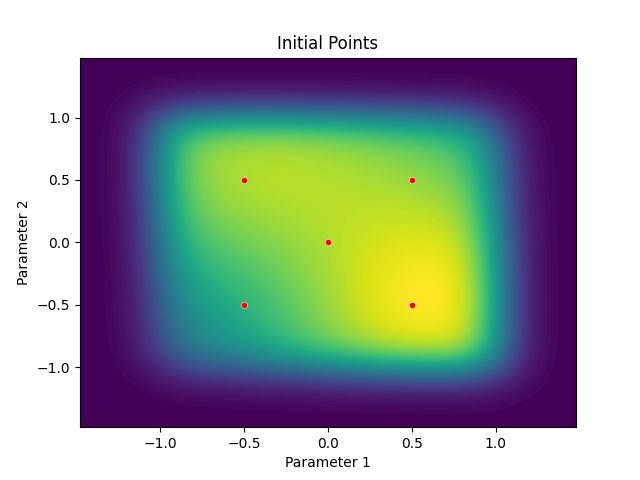

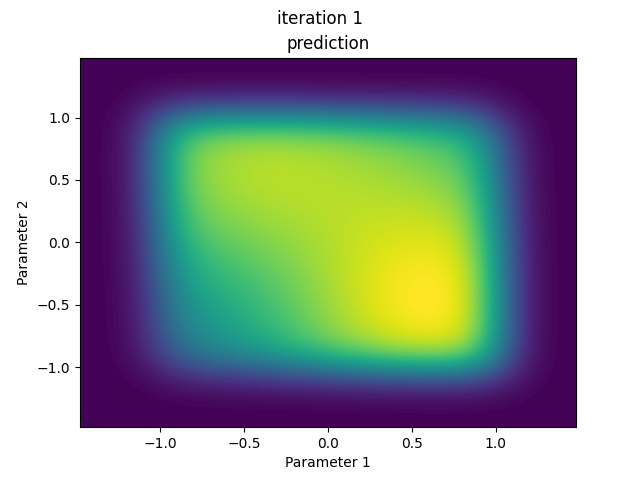

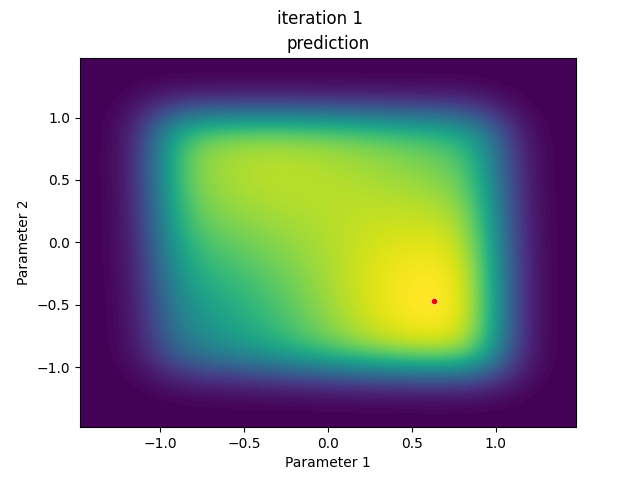

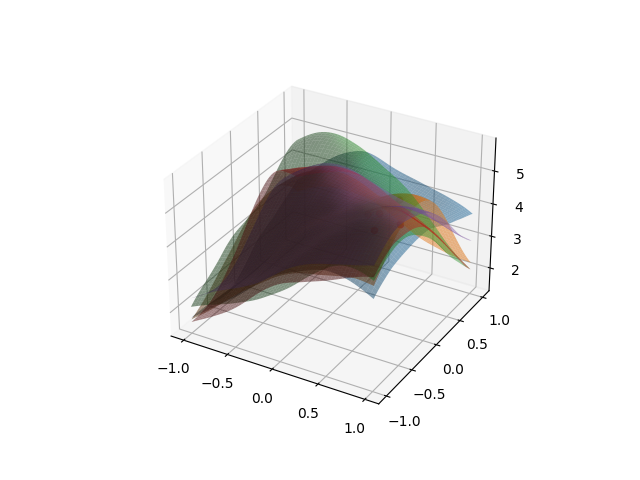

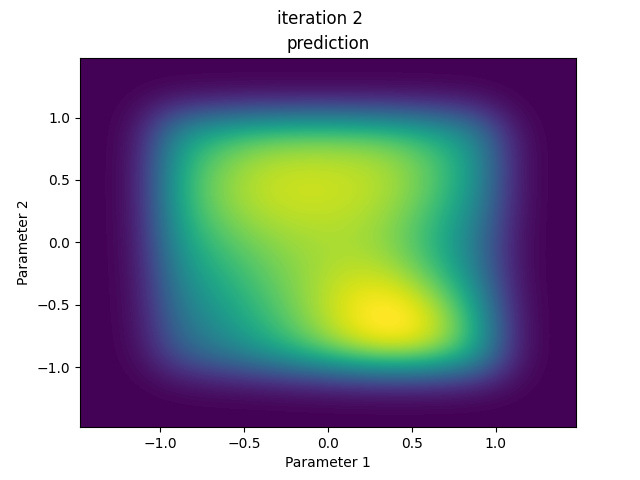

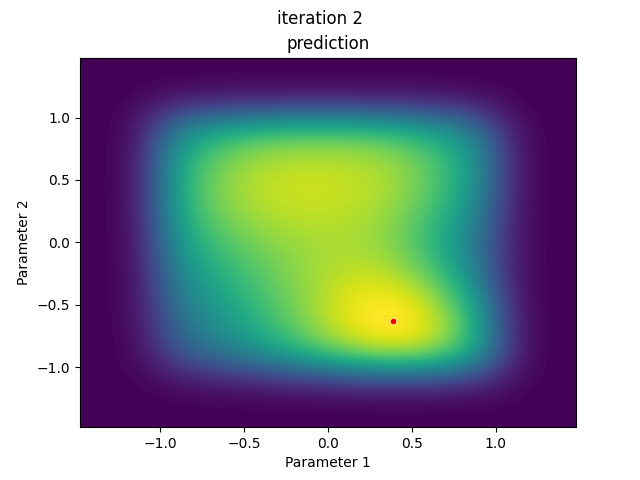

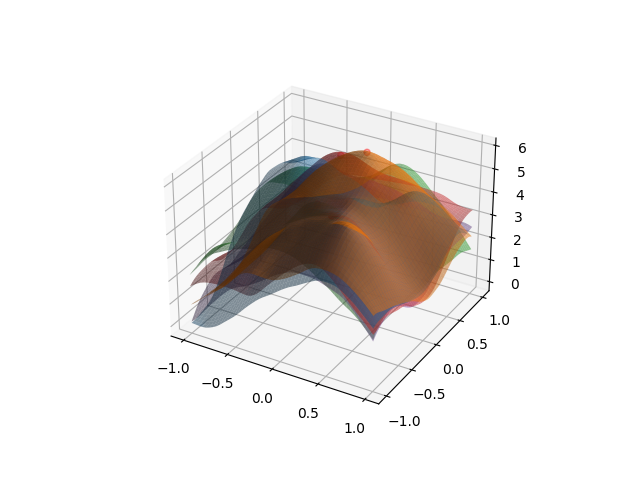

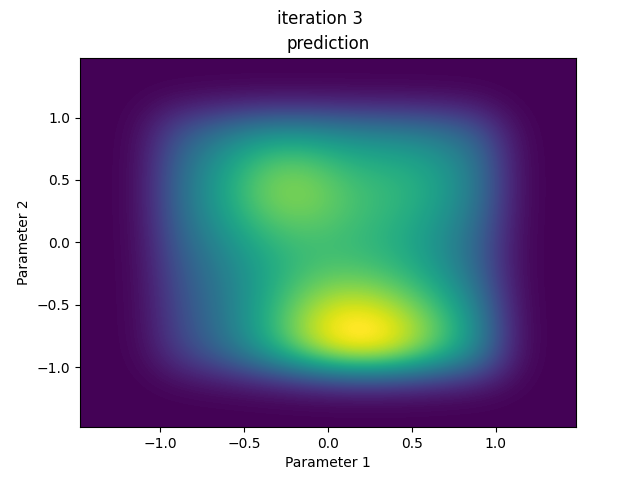

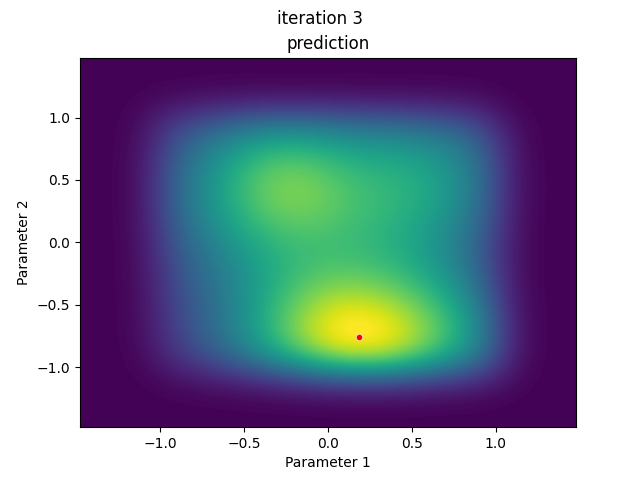

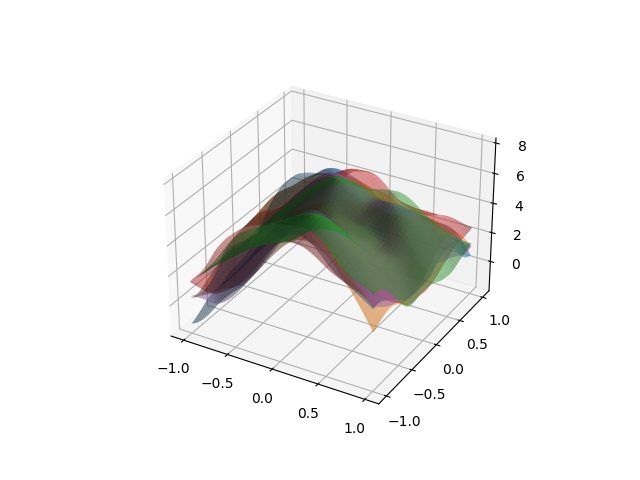

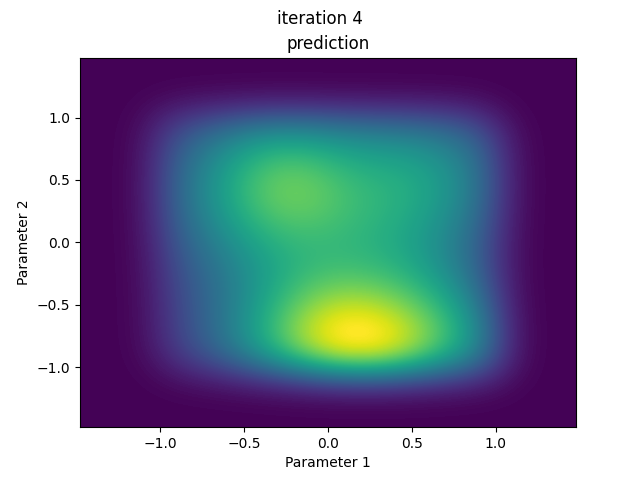

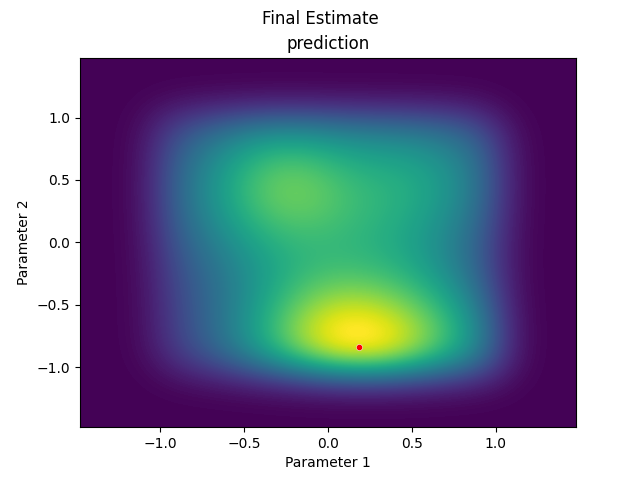

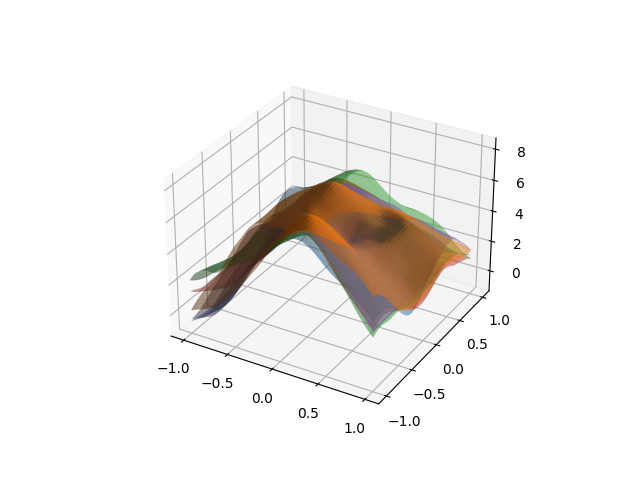

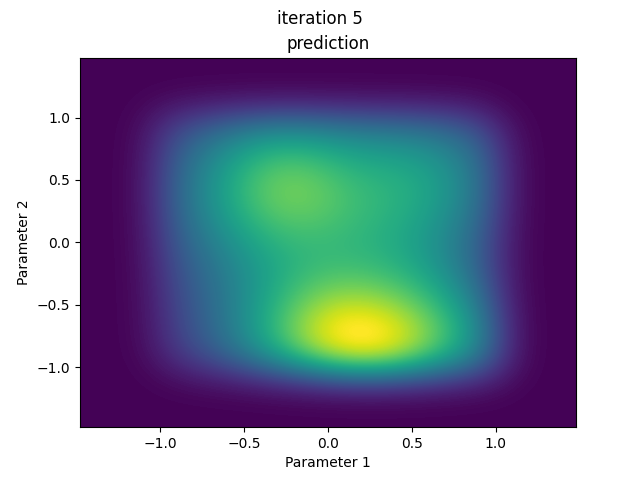

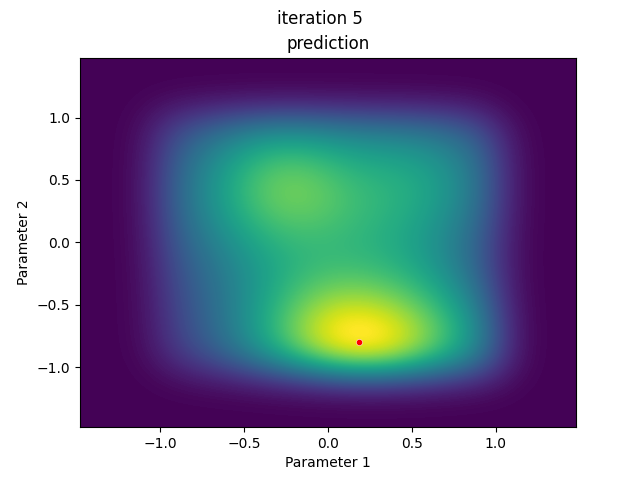

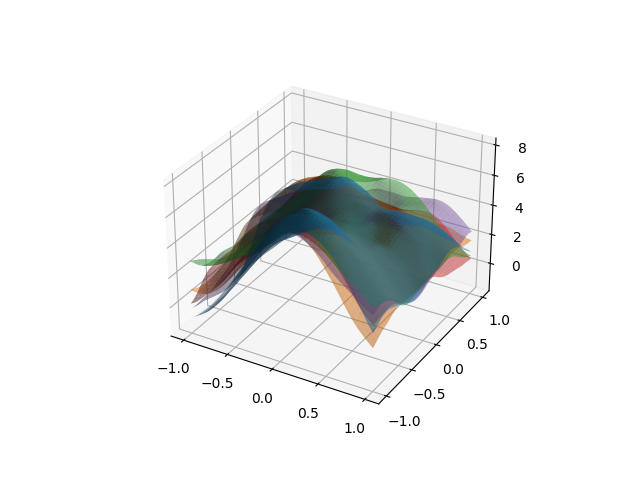

In [4]:
"""
    We run the parallel bayesian optimization algorithm to find the maximum point.

    This is based on the algorithm described in the paper:

    "Parallelised Bayesian Optimisation via Thompson Sampling"

    The algorithm is as follows:

    1. Get some random initial points from the function (sample from a uniform distribution)
    2. Fit a gaussian process to the data
    3. Sample the gaussian process then get the maximum point from the samples
    4. Evaluate the function at the locations of the maximum points from the samples
    5. Add the evaluated points to the data and repeat from step 2

    The "function" in this case would be the 2D function we created above. In practice, the
    function would be the patient response to the cortical stimulation parameters.

    We simulate noise in the function by adding gaussian noise to the function evaluations.
"""

# now create a gaussian process regessor that we want to use for bayesian optimization
from sklearn.gaussian_process import GaussianProcessRegressor

# we want to use a matern kernel
from sklearn.gaussian_process.kernels import Matern

# create the matern kernel
kernel = Matern(length_scale=1, nu=2.5)
noise = 0.01
alpha = 0.01
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=10, random_state=100)

# now get some initial data points from the function for initialization
# sample equadistant points across surface
n_points = 5
X_train = np.array([[0, 0], [-0.5, -0.5], [-0.5, 0.5], [0.5, 0.5], [0.5, -0.5]])

# evaluate the function at the points
Y_train = np.array([f(x) for x in X_train]) + np.random.normal(
    0, noise, n_points
)

# plot the initial points on top of the first guess
# fit the gaussian process to the data
gpr.fit(X_train, Y_train)
Y_pred, Y_std = gpr.predict(
    np.stack([X1.ravel(), X2.ravel()], axis=1), return_std=True
)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.kdeplot(x=X1.ravel(), y=X2.ravel(), weights=Y_pred.ravel(), fill=True, thresh=0, levels=500, cmap="viridis")
# ax.plot_surface(X1, X2, Y, cmap="viridis", alpha=0.5)
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], color="r", s=20)
ax.set_xlabel("Parameter 1")
ax.set_ylabel("Parameter 2")
ax.set_title("Initial Points")
# ax.scatter(X_train[:, 0], X_train[:, 1], Y_train, color="g", s=20)

# store best point at each iteration
best_points = []

# do bayesian optimization loop
iterations = 5
for i in range(iterations):
    # fit the gaussian process to the data
    gpr.fit(X_train, Y_train)
    Y_pred, Y_std = gpr.predict(
        np.stack([X1.ravel(), X2.ravel()], axis=1), return_std=True
    )

    Y_pred2 = Y_pred.reshape(X1.shape)
    Y_std2 = Y_std.reshape(X1.shape)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    # ax.plot_surface(X1, X2, Y_pred2, alpha=0.5)
    sns.kdeplot(x=X1.ravel(), y=X2.ravel(), weights=Y_pred, fill=True, thresh=0, levels=500, cmap="viridis")
    ax1.set_title("prediction")
    ax1.set_xlabel("Parameter 1")
    ax1.set_ylabel("Parameter 2")
    fig.suptitle("iteration %d" % (i + 1))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    # ax.plot_surface(X1, X2, Y_pred2, alpha=0.5)
    sns.kdeplot(x=X1.ravel(), y=X2.ravel(), weights=Y_pred, fill=True, thresh=0, levels=500, cmap="viridis")
    ax1.set_title("prediction")
    ax1.set_xlabel("Parameter 1")
    ax1.set_ylabel("Parameter 2")
    # ax2 = fig.add_subplot(212)
    # # ax.plot_surface(X1, X2, Y_std2, alpha=0.5)
    # sns.kdeplot(x=X1.ravel(), y=X2.ravel(), weights=Y_std, fill=True, thresh=0, levels=500, cmap="viridis")
    # ax2.set_title("prediction variance")
    # ax2.set_xlabel("Parameter 1")
    # ax2.set_ylabel("Parameter 2")

    # report best point so far
    max_point = np.argmax(Y_pred)
    max_x = np.stack([X1.ravel(), X2.ravel()], axis=1)[max_point]
    max_y = Y_pred[max_point]
    print(f"iteration {i + 1}: max point: {max_x} -> {max_y}")
    # report standard deviation at max point
    max_std = Y_std[max_point]
    print(f"iteration {i + 1}: std at max point: {max_std}")
    best_points.append(max_x)
    sns.scatterplot(x=max_x[np.newaxis, 0], y=max_x[np.newaxis, 1], color="r", s=20)

    # now sample the gpr
    samples = gpr.sample_y(np.stack([X1.ravel(), X2.ravel()], axis=1), n_samples=5)
    samples2d = samples.reshape((x1.shape[0], x2.shape[0], 5))

    # get the max point from each sample
    max_points = np.argmax(samples, axis=0)

    # get from X1 and X2 the max points
    max_x = np.stack([X1.ravel(), X2.ravel()], axis=1)[max_points]

    # sns.scatterplot(x=max_x[:, 0], y=max_x[:, 1], color="r", s=20)
    if i + 1 == 4:
        fig.suptitle("Final Estimate")
    else:    
        fig.suptitle("iteration %d" % (i + 1))
    # plot the samples
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    for s in range(samples2d.shape[2]):
        ax.plot_surface(X1, X2, samples2d[..., s], alpha=0.5)
    # plot the max points
    ax.scatter(max_x[:, 0], max_x[:, 1], np.diag(samples[max_points, :]), c="r", s=20)

    # evaluate the function at the max points
    max_y = f(max_x.T) + np.random.normal(0, noise, max_x.shape[0])

    # add the max points to the training data
    X_train = np.concatenate([X_train, max_x])
    Y_train = np.concatenate([Y_train, max_y])

# report the final best point
gpr.fit(X_train, Y_train)
Y_pred, Y_std = gpr.predict(np.stack([X1.ravel(), X2.ravel()], axis=1), return_std=True)
max_point = np.argmax(Y_pred)
max_x = np.stack([X1.ravel(), X2.ravel()], axis=1)[max_point]
max_y = Y_pred[max_point]
print(f"final max point: {max_x} -> {max_y}")
max_std = Y_std[max_point]
print(f"final std at max point: {max_std}")
best_points.append(max_x)

In [ ]:
"""
    Plot the l2 error over the iterations
"""

# compute the squared error over the iterations
best_points = np.array(best_points)
print(ground_truth)
print(best_points)
errors = np.linalg.norm(best_points - ground_truth, axis=1) ** 2
plt.figure()
plt.plot(errors)
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("error over iterations")

In [ ]:
"""
    Plot the final gpr prediction, the mean function as well as the standard deviation function
"""

# get the gpr prediction
Y_pred, Y_std = gpr.predict(np.stack([X1.ravel(), X2.ravel()], axis=1), return_std=True)
Y_pred = Y_pred.reshape(X1.shape)
Y_std = Y_std.reshape(X1.shape)
fig = plt.figure()
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(X1, X2, Y_pred, alpha=0.5)
ax.set_title("mean prediction")
ax = fig.add_subplot(122, projection="3d")
ax.plot_surface(X1, X2, Y_std, alpha=0.5)
ax.set_title("std prediction")

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.kdeplot(x=X1.ravel(), y=X2.ravel(), weights=Y_pred, fill=True, thresh=0, levels=500, cmap="viridis")
ax1.set_title("prediction")
ax1.set_xlabel("Parameter 1")
ax1.set_ylabel("Parameter 2")
fig.suptitle("Final Prediction")